# Research Hackathon project on wildfires in U.S.A.
## Setup (for now):
- **Research Question**: ...
Motivated by an introduction, and possibly a literature review.
- **Data description**
- **Preliminary analysis**: e.g. where do wildfires frequently occur and how are the sizes of fire distributed over the US? what seasonality patterns are in the wildfire frequencies? are there already relationships of interest (depends on the research question) visible without any ML/econometric model? etc.
- **Analysis**: targetted at research question, so t.b.d.
- **Conclusion**: link intro + research question to findings of (preliminary) analysis 

## Possible research questions:
- Can we build a pipeline to forecast the frequency, size and location of wildfires? We can motivate this using central fire brigade allocation for instance.
- How are extreme wildfires distributed? Motivated by the fact that they occur more often now, and we want to help institutions prevent large damages, we want to give inference on the extreme wildfires.
- OR approach: can we build an ML pipeline to model the arrivals (discoveries) and departures (containments) of wildfires?

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.io as pio
import statsmodels.formula.api as sm
import sklearn as skl

# **Load wildfire data**
SQL data has been loaded in Spyder. The data of interest has been exported to a CSV-file. See snippet below. This CSV-file is imported here.

In [2]:
from IPython.display import Image
Image(filename='code_load_data.png')

FileNotFoundError: FileNotFoundError: [Errno 2] No such file or directory: 'code_load_data.png'

In [3]:
df = pd.read_csv('wildfire_data.csv')
print('Number of fires:', df.shape[0])
df.head()

FileNotFoundError: FileNotFoundError: [Errno 2] No such file or directory: 'wildfire_data.csv'

# **Climate features**

In [ ]:
df = pd.read_csv('wildfire_data_with_climate.csv')
print('Number of fires:', df.shape[0])
df.head()

Number of fires: 892007





/var/folders/xn/gg8ygwfs2gngfftz6t8k9wm80000gn/T/ipykernel_3519/3065024453.py:1: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.




,Unnamed: 0,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME,DISCOVERY_DATE,DISCOVERY_DOY,...,DISCOVERY_TIME,CONT_TIME,tmp,pcp,pdsi,DATE,MONTH,tmp_monthly,pcp_monthly,pdsi_monthly
0,0,2005,Miscellaneous,40.036944,-121.005833,CA,63.0,Plumas,2453403.5,33,...,13.00,17.30,59.736364,2.026364,3.050000,2005-02-02,2,47.1,4.03,2.28
1,1,2004,Lightning,38.933056,-120.404444,CA,61.0,Placer,2453137.5,133,...,8.45,15.30,60.154545,1.477273,-1.234545,2004-05-12,5,63.2,0.45,-2.15
2,2,2004,Debris Burning,38.984167,-120.735556,CA,17.0,El Dorado,2453156.5,152,...,19.21,20.24,60.154545,1.477273,-1.234545,2004-05-31,5,63.2,0.45,-2.15
3,3,2004,Lightning,38.559167,-119.913333,CA,3.0,Alpine,2453184.5,180,...,16.00,14.00,60.154545,1.477273,-1.234545,2004-06-28,6,70.4,0.08,-2.80
4,4,2004,Lightning,38.559167,-119.933056,CA,3.0,Alpine,2453184.5,180,...,16.00,12.00,60.154545,1.477273,-1.234545,2004-06-28,6,70.4,0.08,-2.80


   Unnamed: 0  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  \
0           0       2005    Miscellaneous  40.036944 -121.005833    CA   
1           1       2004        Lightning  38.933056 -120.404444    CA   
2           2       2004   Debris Burning  38.984167 -120.735556    CA   
3           3       2004        Lightning  38.559167 -119.913333    CA   
4           4       2004        Lightning  38.559167 -119.933056    CA   

   FIPS_CODE  FIPS_NAME  DISCOVERY_DATE  DISCOVERY_DOY  ...  DISCOVERY_TIME  \
0       63.0     Plumas       2453403.5             33  ...           13.00   
1       61.0     Placer       2453137.5            133  ...            8.45   
2       17.0  El Dorado       2453156.5            152  ...           19.21   
3        3.0     Alpine       2453184.5            180  ...           16.00   
4        3.0     Alpine       2453184.5            180  ...           16.00   

   CONT_TIME        tmp       pcp      pdsi        DATE  MONTH  tmp_monthly  \
0

The feature matching is performed in my local server because of unstable connection here. See 'ClimateMatch.py' for the code.

**Six new features are added:**
- 'tmp_monthly': the average temprature of the month in the state when and where the fire happened.
- 'pcp_monthly': the average precipitition of the month in the state when and where the fire happened.
- 'pdsi_monthly': the Palmer Drought Severity Index of the month in the state when and where the fire happened.
- 'tmp_yearly': the average temprature of the year in the state when and where the fire happened.
- 'pcp_monthly': the average precipitition of the year in the state when and where the fire happened.
- 'pdsi_monthly': the average Palmer Drought Severity Index of the year in the state when and where the fire happened.

*Note that the missing values are marked as -99.99.*

**Data source:** 

Vose, R. S., Applequist, S., Squires, M., Durre, I., Menne, M. J., Williams, C. N., Jr., Fenimore, C., Gleason, K., & Arndt, D. (2014). Improved Historical Temperature and Precipitation Time Series for U.S. Climate Divisions, Journal of Applied Meteorology and Climatology, 53(5), 1232-1251. Retrieved Feb 6, 2023, from https://journals.ametsoc.org/view/journals/apme/53/5/jamc-d-13-0248.1.xml

Readme file of the dataset: https://www.ncei.noaa.gov/pub/data/cirs/climdiv/state-readme.txt


Data file used in the the following analysis: 'climdiv-pcpnst-v1.0.0-20230106.txt', 'climdiv-pdsist-v1.0.0-20230106.txt', and 'climdiv-tmpcst-v1.0.0-20230106.txt'

In [ ]:
# we can use the discovery time to investigate whether the fire army has improved (e.g. did the discovery time decreases?)

lDAY_TO_CONT=[]
lHOUR_TO_CONT = []
for i in df.index:
    vDay2cont = df.loc[i,'CONT_DATE']-df.loc[i,'DISCOVERY_DATE']
    vHour2cont = (24 - df.loc[i,'DISCOVERY_TIME']) + (vDay2cont-1)*24 + df.loc[i,'CONT_TIME']
    lDAY_TO_CONT.append(round(vDay2cont))
    lHOUR_TO_CONT.append(round(vHour2cont)) # this also rounds it to full hours, may be relaxed
df['DAY_TO_CONT'] = lDAY_TO_CONT
df['HOUR_TO_CONT'] = lHOUR_TO_CONT
# df = df[df['DAY_TO_CONT']>0]

# get frequency of wildfires for each year
years = df['FIRE_YEAR'].unique()
years.sort()
freqs = []
for year in years:
    freq = float(df['FIRE_YEAR'][df['FIRE_YEAR'] == year].count() / 365)
    freqs.append(freq)
    # print(f'Frequency: {year} -> ', freq)
    
freqs_dict = {'year': years, 'frequency': freqs}
df_freq = pd.DataFrame(data=freqs_dict)

# get dates of discovery in normal date format
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'], unit='D', origin='julian')

In [ ]:
df['FIRE_SIZE_CLASS_NUM'] = [ord(x) - 64 for x in df.FIRE_SIZE_CLASS]
df_truncated_day = df[df.DAY_TO_CONT>0]

                            OLS Regression Results                            
Dep. Variable:            DAY_TO_CONT   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1263.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:45:54   Log-Likelihood:            -8.2789e+05
No. Observations:              170956   AIC:                         1.656e+06
Df Residuals:                  170952   BIC:                         1.656e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.9048    

## ML Classification

In [ ]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## for explainer
#from lime import lime_tabular

In [ ]:
# Create dummy variable to predict
dThreshold = 5
df['Y'] = (df.HOUR_TO_CONT >= dThreshold)*1

# Create dummy variables for cause of fire
dfDummy = pd.get_dummies(df['STAT_CAUSE_DESCR']) 
le = LabelEncoder()
dfState = pd.Series(le.fit_transform(df.STATE), name='State')

# Get X and y variables
mX = df[["LATITUDE",'LONGITUDE','FIRE_SIZE_CLASS_NUM', 'DISCOVERY_DOY', 'FIRE_YEAR','tmp_monthly','pcp_monthly','pdsi_monthly',
         'pcp_monthly','pdsi_monthly']]
mX = pd.concat([mX, dfDummy, dfState], axis=1)   
feature_names = mX.columns
vY = df[['Y']]
# vY = df[['DAY_TO_CONT']]

mX = mX.iloc[:10000,:] # Why this?
vY = vY.iloc[:10000]

# remove trend
indices = np.arange(len(vY))
np.random.shuffle(indices)
mX = mX.iloc[indices,:]
vY = vY.iloc[indices]

# Create train-test set
X_train, X_validation, Y_train, Y_validation = train_test_split(mX, vY, test_size=0.25, random_state=1)

# reformat
X_train = X_train.values
y_train = Y_train.values.reshape(-1,)
X_test = X_validation.values
y_test = Y_validation.values

## Simple Logistic Regressor (baseline model)

In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.643 (0.032)




/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter

## Feature selection

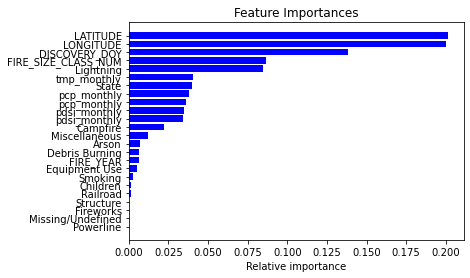

<Figure size 432x288 with 1 Axes>

In [ ]:
## call model
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# fit model
rf.fit(X_train, y_train)

importances = rf.feature_importances_
std = np.std([importances for tree in rf.estimators_], axis=0)
indic = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indic)), importances[indic], color='b', align='center', yerr=std[indic])
plt.yticks(range(len(indic)), [feature_names[i] for i in indic])
plt.xlabel('Relative importance')
plt.show()

In [ ]:
X_names = ["LONGITUDE", "LATITUDE", "DISCOVERY_DOY", "Lightning", "FIRE_SIZE_CLASS_NUM", "tmp_monthly",
"State", "pcp_monthly", "pdsi_monthly", "Campfire"]
mX = mX[X_names]

# Create train-test set
X_train, X_validation, Y_train, Y_validation = train_test_split(mX, vY, test_size=0.25, random_state=1)

# reformat
X_train = X_train.values
y_train = Y_train.values.reshape(-1,)
X_test = X_validation.values
y_test = Y_validation.values

### Gradient boosting

/var/folders/xn/gg8ygwfs2gngfftz6t8k9wm80000gn/T/ipykernel_3519/3643451384.py:10: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/var/folders/xn/gg8ygwfs2gngfftz6t8k9wm80000gn/T/ipykernel_3519/3643451384.py:10: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/var/folders/xn/gg8ygwfs2gngfftz6t8k9wm80000gn/T/ipykernel_3519/3643451384.py:10: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/var/folders/xn/gg8ygwfs2gngfftz6t8k9wm80000gn/T/ipykernel_3519/3643451384.py:10: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead

/var/folders/xn/gg8ygwfs2gngfftz6t8k9wm80000gn/T/ipykernel_3519/3643451384.py:10: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead




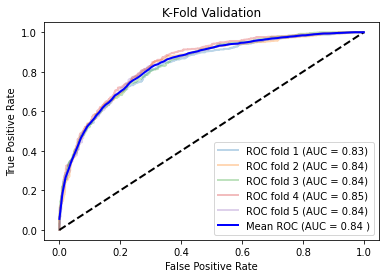

<Figure size 432x288 with 1 Axes>

In [ ]:

## call model
model = ensemble.GradientBoostingClassifier()

# Cross validatio
cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
   prediction = model.fit(X_train[train],
                y_train[train]).predict_proba(X_train[test])
   fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1])
   tprs.append(scipy.interp(mean_fpr, fpr, tpr))
   roc_auc = metrics.auc(fpr, tpr)
   aucs.append(roc_auc)
   plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
   i = i+1
   
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")
plt.show()

In [ ]:

model.fit(X_train, y_train)
## test
predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)

In [ ]:
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.76
Auc: 0.85
Recall (all 1s predicted right): 0.78
Precision (confidence when predicting a 1): 0.76
Detail:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1235
           1       0.76      0.78      0.77      1265

    accuracy                           0.76      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.76      0.76      0.76      2500



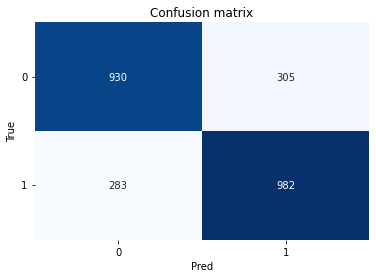

<Figure size 432x288 with 1 Axes>

In [ ]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

AttributeError: AttributeError: 'numpy.ndarray' object has no attribute 'legend'

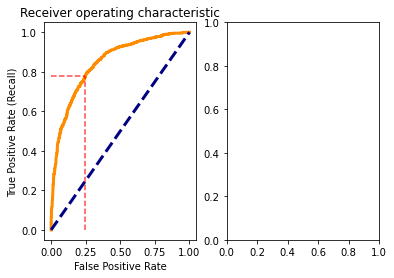

<Figure size 432x288 with 2 Axes>

In [ ]:
classes = np.unique(y_test)
fig, ax = plt.subplots(nrows=1, ncols=2)
## plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob)
roc_auc = metrics.auc(fpr, tpr)     
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")     
ax.legend(loc="lower right")
ax.grid(True)
## annotate ROC thresholds
thres_in_plot = []
for i,t in enumerate(thresholds):
     t = np.round(t,1)
     if t not in thres_in_plot:
         ax.annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]), 
              textcoords='offset points', ha='left', va='bottom')
         thres_in_plot.append(t)
     else:
         next
## plot P-R curve
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted_prob)
roc_auc = metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)
## annotate P-R thresholds
thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
         ax.annotate(np.round(t,1), xy=(recalls[i],precisions[i]), 
               xytext=(recalls[i],precisions[i]), 
               textcoords='offset points', ha='left', va='bottom')
         thres_in_plot.append(t)
    else:
         next
plt.show()